In [106]:
import gensim
from gensim.models.phrases import Phrases, Phraser
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import string
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/norika_machome/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/norika_machome/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [97]:
# Load the CSV file
df = pd.read_csv("summaries.csv")

# Define a function to clean and tokenize the text
def clean_and_tokenize(text):
    # Remove newline characters
    text = text.replace('\n', ' ')

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove punctuation and stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

    # Join the tokens back into a string for Cleaned Text
    cleaned_text = ' '.join(tokens)

    return cleaned_text, tokens

# Apply the cleaning and tokenization function to the 'Text' column
df['Cleaned Text'], df['Tokenized Text'] = zip(*df['Text'].apply(clean_and_tokenize))

# Train a bigram model
phrases = Phrases(df['Tokenized Text'], min_count=5, threshold=10)
bigram = Phraser(phrases)

# Apply the bigram model to transform the tokenized text
df['Bigram Text'] = df['Tokenized Text'].apply(lambda x: bigram[x])

# Exclude unwanted words and bigrams
exclude_words = {
    'said', 'could', 'many', 'also', 'must', 'may', 'would', 'us', 'one', 'new', 
    'however', 'important', 'use', 'well', 'including', 'explained', 'noted', 
    'example', 'order', 'stated', 'often', 'session', 'jp', 'session_chair', 'plenary_session',
    'around_world', 'chief_executive', 'executive_officer', 'vice_president', 'also_discussed',
    'participants', 'president', 'percent', 'shadows', 'sts_forum', 'director', 'society_forum',
    'concurrent_sessions', 'former_president',
    'minister', 'issue', 'issues', 'chair', 'please_contact', 'speakers', 'speaker', 'chairman', 'much',
    'building_nagatacho', 'opening_remarks'
}

# Define a function to filter out excluded words and bigrams
def filter_excluded_words(bigram_text):
    return [word for word in bigram_text if word not in exclude_words]

# Apply the exclusion function
df['Filtered Bigram Text'] = df['Bigram Text'].apply(filter_excluded_words)

# Display the DataFrame with cleaned, tokenized, and bigrammed text
df.head()


,Year,Text,Cleaned Text,Tokenized Text,Bigram Text,Filtered Bigram Text
0,2004,\n\nScience and Technology in Society forum\n\...,science technology society forum science techn...,"[science, technology, society, forum, science,...","[science_technology, society_forum, science_te...","[science_technology, science_technology, socie..."
1,2005,\nScience and Technology in Society (STS) foru...,science technology society sts forum lights sh...,"[science, technology, society, sts, forum, lig...","[science_technology, society, sts_forum, light...","[science_technology, society, lights_shadows, ..."
2,2006,\nScience and Technology in Society (STS) foru...,science technology society sts forum lights sh...,"[science, technology, society, sts, forum, lig...","[science_technology, society, sts_forum, light...","[science_technology, society, lights_shadows, ..."
3,2007,Science and Technology in Society (STS) forum...,science technology society sts forum lights sh...,"[science, technology, society, sts, forum, lig...","[science_technology, society, sts_forum, light...","[science_technology, society, lights_shadows, ..."
4,2008,STS forum 2008 I\nScience and Technology...,sts forum science technology society sts forum...,"[sts, forum, science, technology, society, sts...","[sts_forum, science_technology, society, sts_f...","[science_technology, society, npo_sanno, grand..."


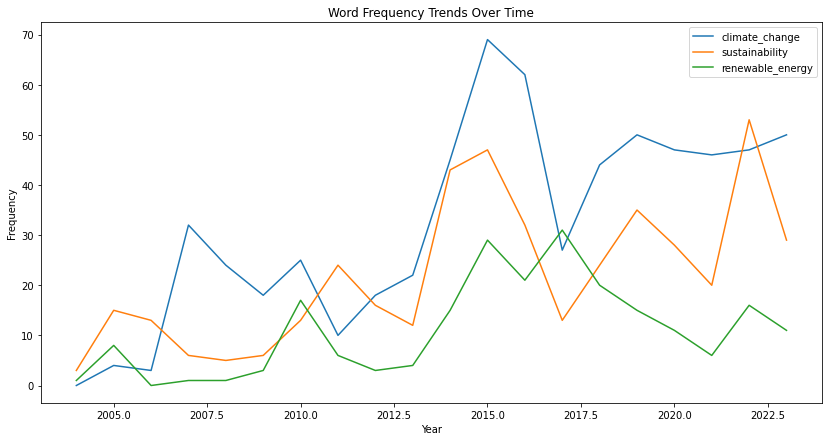

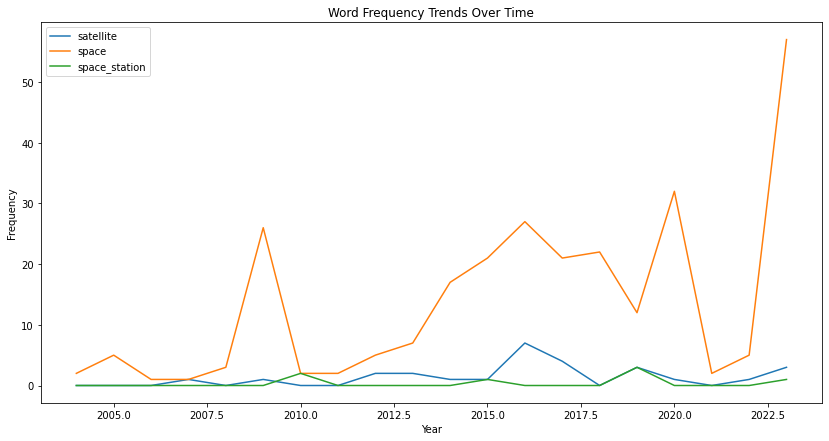

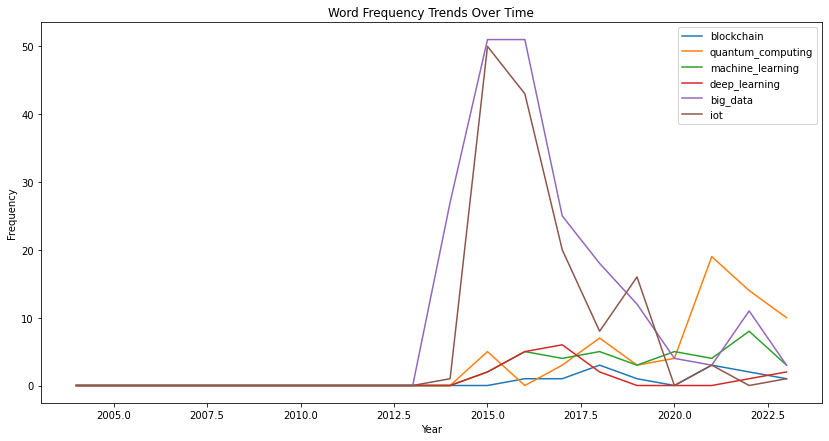

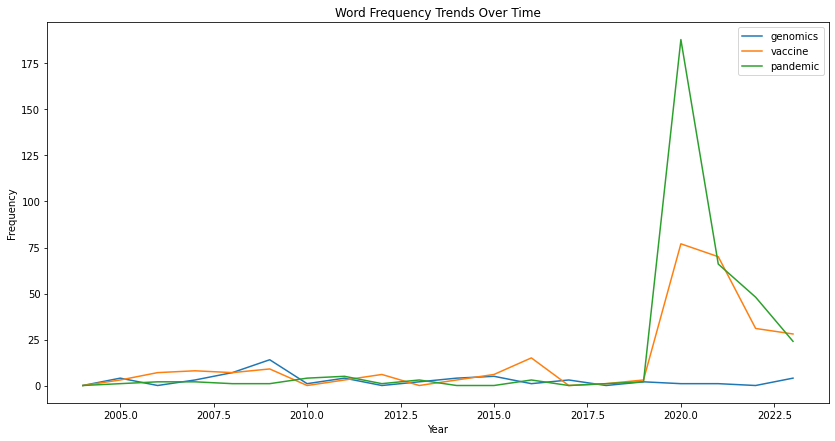

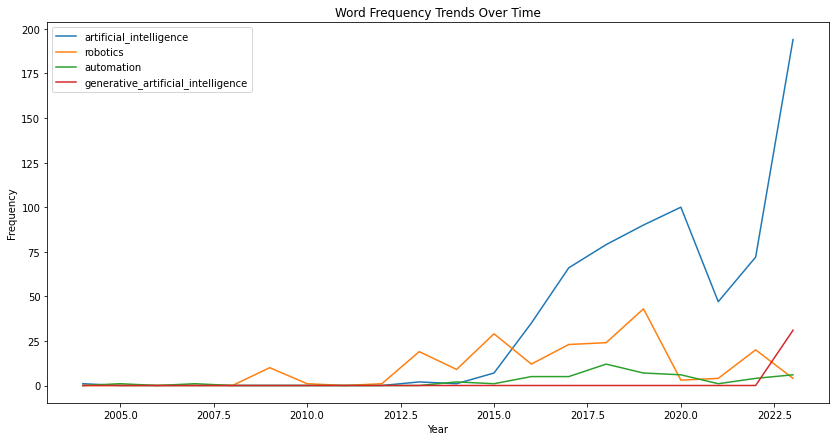

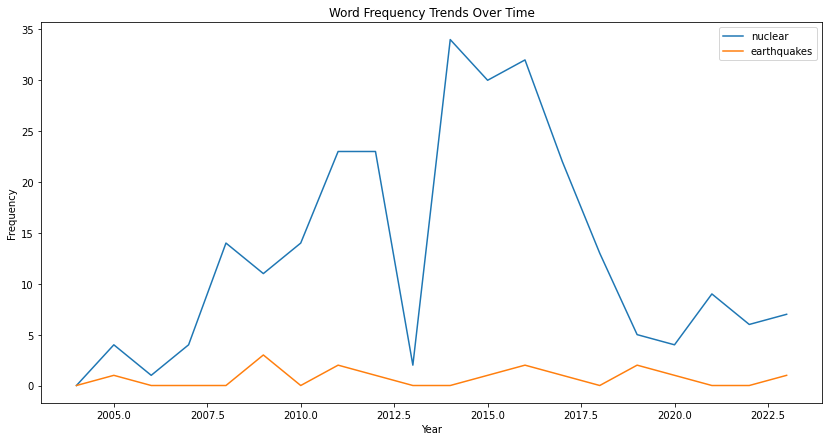

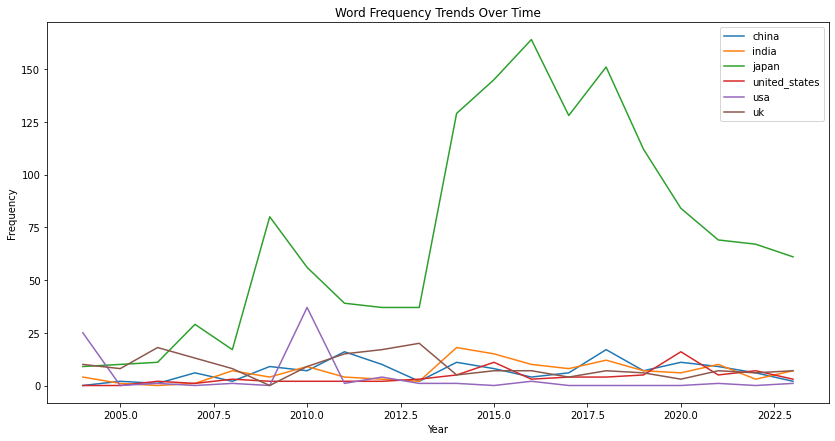

In [105]:

# Create a new DataFrame to hold word frequencies by year
word_freq_by_year = {}

# Aggregate word frequencies by year
for year, group in df.groupby('Year'):
    all_words = [word for sublist in group['Filtered Bigram Text'] for word in sublist]
    word_counts = Counter(all_words)
    word_freq_by_year[year] = word_counts

# Convert to DataFrame for easier analysis
word_freq_df = pd.DataFrame(word_freq_by_year).fillna(0).astype(int)

# Function to plot trends of specific words
def plot_word_trends(words):
    plt.figure(figsize=(14, 7))
    for word in words:
        if word in word_freq_df.index:
            plt.plot(word_freq_df.columns, word_freq_df.loc[word], label=word)
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.title('Word Frequency Trends Over Time')
    plt.legend()
    plt.show()

# Plot trends for selected words
selected_words_climate = ['climate_change',  'sustainability', 'renewable_energy']
selected_words_space = ['satellite', 'space', 'space_station']
selected_words_technology = ['blockchain', 'quantum_computing', 'machine_learning', 'deep_learning', 'big_data', 'iot']
selected_words_health = [ 'genomics', 'vaccine',  'pandemic', ]
selected_words_ai = ['artificial_intelligence', 'robotics', 'automation', 'generative_artificial_intelligence']
selected_words_scale = ['nuclear', 'nuclear_enerygy', 'earthquakes' ]
selected_words = ['basic_science', 'patent', 'clone' ]
selected_words = ['china', 'india', 'japan', 'united_states', 'usa', 'uk' ]




plot_word_trends(selected_words_climate)
plot_word_trends(selected_words_space)
plot_word_trends(selected_words_technology)
plot_word_trends(selected_words_health)
plot_word_trends(selected_words_ai)
plot_word_trends(selected_words_scale)
plot_word_trends(selected_words)
# plot_word_trends(selected_words + selected_words_climate + selected_words_space + selected_words_technology + selected_words_health + selected_words_ai)


In [20]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models.phrases import Phrases, Phraser
from collections import Counter

# Ensure you have the necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Load the CSV file
df = pd.read_csv("summaries.csv")

# Define a function to clean the text
def clean_text(text):
    # Remove newline characters
    text = text.replace('\n', ' ')

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove punctuation and stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

    return tokens

# Apply the cleaning function to the 'Text' column
df['Tokenized Text'] = df['Text'].apply(clean_text)

# Train a bigram model
phrases = Phrases(df['Tokenized Text'], min_count=5, threshold=10)
bigram = Phraser(phrases)

# Apply the bigram model to transform the tokenized text
df['Bigram Text'] = df['Tokenized Text'].apply(lambda x: bigram[x])

exclude_words = {
    'said', 'could', 'many', 'also', 'must', 'may', 'would', 'us', 'one', 'new', 
    'however', 'important', 'use', 'well', 'including', 'explained', 'noted', 
    'example', 'order', 'stated', 'often', 'session', 'jp', 'session_chair', 
    'participants', 'president', 'percent', 'shadows', 'sts_forum', 'director', 'society_forum',
    'minister', 'issue', 'issues', 'chair', 'please_contact', 'speakers', 'speaker', 'chairman', 'much',
    'building_nagatacho', 'opening_remarks'
}

# Define a function to count top 10 words/phrases
def count_top_phrases(text):
    phrase_counts = Counter(word for word in text if word not in exclude_words)
    top_10_phrases = phrase_counts.most_common(10)
    return dict(top_10_phrases)

def count_top_phrases30(text):
    phrase_counts = Counter(word for word in text if word not in exclude_words)
    top_30_phrases = phrase_counts.most_common(30)
    return dict(top_30_phrases)

# Apply the function to the 'Bigram Text' column
df['Top 10 Phrases'] = df['Bigram Text'].apply(count_top_phrases)
df['Top 30 Phrases'] = df['Bigram Text'].apply(count_top_phrases30)

# Create a new DataFrame with the desired columns
new_df = df[['Year', 'Text', 'Tokenized Text', 'Top 10 Phrases', 'Top 30 Phrases']]

# Display the new DataFrame
display(new_df.head(20))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/norika_machome/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/norika_machome/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Year,Text,Tokenized Text,Top 10 Phrases,Top 30 Phrases
0,2004,\n\nScience and Technology in Society forum\n\...,"[science, technology, society, forum, science,...","{'science': 66, 'research': 45, 'science_techn...","{'science': 66, 'research': 45, 'science_techn..."
1,2005,\nScience and Technology in Society (STS) foru...,"[science, technology, society, sts, forum, lig...","{'science_technology': 139, 'science': 61, 're...","{'science_technology': 139, 'science': 61, 're..."
2,2006,\nScience and Technology in Society (STS) foru...,"[science, technology, society, sts, forum, lig...","{'science_technology': 99, 'science': 68, 'res...","{'science_technology': 99, 'science': 68, 'res..."
3,2007,Science and Technology in Society (STS) forum...,"[science, technology, society, sts, forum, lig...","{'science_technology': 114, 'science': 90, 're...","{'science_technology': 114, 'science': 90, 're..."
4,2008,STS forum 2008 I\nScience and Technology...,"[sts, forum, science, technology, society, sts...","{'research': 103, 'science': 91, 'need': 72, '...","{'research': 103, 'science': 91, 'need': 72, '..."
5,2009,Science and Technology in Society\nNon-Profit ...,"[science, technology, society, organization, s...","{'science_technology': 109, 'research': 100, '...","{'science_technology': 109, 'research': 100, '..."
6,2010,Science and Technology in Society\nNon-Profit ...,"[science, technology, society, organization, s...","{'energy': 87, 'science_technology': 84, 'rese...","{'energy': 87, 'science_technology': 84, 'rese..."
7,2011,Science and Technology in Society\nNon-Profit ...,"[science, technology, society, organization, s...","{'research': 81, 'technology': 64, 'developmen...","{'research': 81, 'technology': 64, 'developmen..."
8,2012,II STS forum 2012 ...,"[ii, sts, forum, sunday, october, opening, ple...","{'research': 118, 'energy': 65, 'technology': ...","{'research': 118, 'energy': 65, 'technology': ..."
9,2013,STS forum – Scien ce and Technology in Societ...,"[sts, forum, scien, ce, technology, society, f...","{'science_technology': 109, 'research': 104, '...","{'science_technology': 109, 'research': 104, '..."


In [95]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter, defaultdict
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure you have the necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Load the CSV file
df = pd.read_csv("summaries.csv")

# Filter the DataFrame for specific years
df_filtered = df[df['Year'].isin([2004, 2005, 2022, 2023])]

# Define a function to clean and tokenize sentences
def clean_and_tokenize_sentences(text):
    # Tokenize the text into sentences
    sentences = sent_tokenize(text)
    
    # Define stopwords
    stop_words = set(stopwords.words('english'))
    
    # Tokenize each sentence and remove stopwords and punctuation
    tokenized_sentences = []
    for sentence in sentences:
        tokens = word_tokenize(sentence)
        tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
        tokenized_sentences.append(tokens)
    
    return tokenized_sentences

# Apply the function to the 'Text' column
df_filtered['Tokenized Sentences'] = df_filtered['Text'].apply(clean_and_tokenize_sentences)

# Create a set of all unique words across all sentences
all_words = set(word for sentences in df_filtered['Tokenized Sentences'] for sentence in sentences for word in sentence)
all_words = list(all_words)  # Convert set to list

# Initialize the co-occurrence matrix with zeros
co_occurrence_matrix = pd.DataFrame(0, index=all_words, columns=all_words)

# Populate the co-occurrence matrix
for sentences in df_filtered['Tokenized Sentences']:
    for sentence in sentences:
        for i, word1 in enumerate(sentence):
            for j, word2 in enumerate(sentence):
                if i != j:
                    co_occurrence_matrix.at[word1, word2] += 1

# Display the top 10 co-occurring pairs
co_occurrence_sums = co_occurrence_matrix.sum(axis=1).sort_values(ascending=False)
print("Top 10 co-occurring pairs:")
print(co_occurrence_sums.head(10))

# Heatmap visualization for the top 20 words
top_words = co_occurrence_sums.head(20).index
top_co_occurrence_matrix = co_occurrence_matrix.loc[top_words, top_words]

plt.figure(figsize=(12, 10))
sns.heatmap(top_co_occurrence_matrix, annot=True, cmap='Blues')
plt.title('Top 20 Words Co-occurrence Matrix for Selected Years (2004, 2005, 2022, 2023)')
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/norika_machome/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/norika_machome/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/d2/ygrgxxds7cn74zttdpjq_l6c0000gn/T/ipykernel_27597/2759755510.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Tokenized Sentences'] = df_filtered['Text'].apply(clean_and_tokenize_sentences)


KeyboardInterrupt: 

In [5]:
from collections import Counter

# Define a function to count top 10 words
def count_top_words(text):
    words = text.split()
    word_counts = Counter(words)
    top_20_words = word_counts.most_common(20)
    return dict(top_20_words)

# Apply the function to the 'Cleaned Text' column
df['Top 20 Words'] = df['Cleaned Text'].apply(count_top_words)

# Display the DataFrame with top 20 words for each row

for i in range(20):
    display(df['Year'][i], df['Top 20 Words'][i])

2004

{'science': 108,
 'technology': 62,
 'session': 51,
 'countries': 50,
 'research': 50,
 'energy': 47,
 'society': 41,
 'said': 41,
 'president': 40,
 'developing': 39,
 'new': 36,
 'scientific': 34,
 'public': 31,
 'jp': 30,
 'government': 30,
 'must': 29,
 'also': 29,
 'global': 28,
 'nanotechnology': 28,
 'forum': 26}

2005

{'science': 211,
 'technology': 176,
 'society': 84,
 'president': 75,
 'research': 66,
 'forum': 64,
 'us': 63,
 'new': 61,
 'human': 57,
 'jp': 57,
 'session': 56,
 'energy': 55,
 'development': 53,
 'director': 48,
 'university': 47,
 'knowledge': 43,
 'information': 41,
 'world': 38,
 'countries': 38,
 'global': 37}

2006

{'science': 184,
 'technology': 126,
 'new': 75,
 'president': 73,
 'us': 69,
 'forum': 64,
 'society': 61,
 'research': 55,
 'director': 49,
 'world': 49,
 'university': 49,
 'session': 48,
 'energy': 46,
 'development': 44,
 'jp': 44,
 'chairman': 43,
 'national': 39,
 'information': 35,
 'countries': 35,
 'scientific': 34}

2007

{'science': 221,
 'technology': 181,
 'research': 112,
 'new': 87,
 'us': 86,
 'forum': 83,
 'need': 81,
 'president': 80,
 'innovation': 77,
 'countries': 77,
 'global': 67,
 'developing': 66,
 'energy': 64,
 'society': 60,
 'international': 59,
 'development': 59,
 'public': 56,
 'world': 53,
 'scientific': 52,
 'must': 52}

2008

{'science': 168,
 'technology': 140,
 'research': 123,
 'countries': 105,
 'developing': 93,
 'new': 76,
 'need': 74,
 'president': 73,
 'must': 73,
 'energy': 72,
 'world': 68,
 'water': 68,
 'scientists': 64,
 'development': 63,
 'global': 61,
 'ict': 58,
 'international': 57,
 'also': 56,
 'forum': 54,
 'scientific': 53}

2009

{'science': 207,
 'technology': 180,
 'research': 123,
 'must': 112,
 'japan': 91,
 'scientists': 87,
 'world': 85,
 'new': 84,
 'energy': 80,
 'president': 80,
 'need': 73,
 'countries': 73,
 'one': 67,
 'global': 66,
 'also': 63,
 'people': 57,
 'forum': 53,
 'university': 52,
 'international': 51,
 'scientific': 51}

2010

{'science': 161,
 'technology': 153,
 'energy': 144,
 'world': 100,
 'also': 99,
 'one': 97,
 'said': 94,
 'new': 87,
 'research': 87,
 'must': 83,
 'global': 81,
 'people': 79,
 'countries': 74,
 'japan': 68,
 'president': 68,
 'forum': 61,
 'change': 60,
 'developing': 59,
 'water': 59,
 'need': 59}

2011

{'also': 130,
 'technology': 120,
 'science': 106,
 'research': 101,
 'energy': 94,
 'new': 82,
 'us': 77,
 'must': 76,
 'development': 69,
 'important': 66,
 'world': 65,
 'forum': 63,
 'need': 62,
 'one': 62,
 'water': 59,
 'nuclear': 58,
 'innovation': 57,
 'university': 57,
 'president': 55,
 'future': 53}

2012

{'research': 138,
 'science': 128,
 'also': 125,
 'technology': 124,
 'energy': 101,
 'countries': 86,
 'people': 75,
 'must': 73,
 'one': 73,
 'president': 72,
 'innovation': 69,
 'world': 69,
 'forum': 67,
 'development': 66,
 'water': 62,
 'scientific': 62,
 'new': 61,
 'public': 60,
 'nuclear': 58,
 'global': 57}

2013

{'forum': 219,
 'technology': 193,
 'science': 183,
 'sts': 147,
 'research': 131,
 'energy': 109,
 'japan': 106,
 'also': 98,
 'society': 95,
 'one': 94,
 'press': 93,
 'new': 91,
 'innovation': 77,
 'tokyo': 76,
 'world': 75,
 'building': 73,
 'organization': 67,
 'global': 65,
 'grand': 63,
 'sanno': 62}

2014

{'also': 400,
 'technology': 377,
 'science': 354,
 'research': 233,
 'innovation': 232,
 'countries': 213,
 'society': 205,
 'would': 195,
 'one': 184,
 'session': 181,
 'new': 180,
 'energy': 169,
 'world': 166,
 'important': 159,
 'must': 158,
 'need': 154,
 'issues': 153,
 'data': 153,
 'speaker': 152,
 'people': 148}

2015

{'science': 417,
 'also': 384,
 'technology': 378,
 'speaker': 305,
 'innovation': 244,
 'nationality': 237,
 'research': 231,
 'japan': 229,
 'energy': 226,
 'must': 220,
 'new': 219,
 'data': 191,
 'world': 182,
 'society': 176,
 'session': 172,
 'issues': 171,
 'would': 167,
 'development': 161,
 'stated': 159,
 'need': 157}

2016

{'science': 405,
 'technology': 349,
 'also': 315,
 'research': 231,
 'speaker': 227,
 'data': 219,
 'energy': 209,
 'japan': 196,
 'must': 181,
 'new': 173,
 'innovation': 172,
 'session': 170,
 'development': 169,
 'chair': 158,
 'issues': 157,
 'important': 155,
 'society': 151,
 'countries': 151,
 'group': 142,
 'public': 137}

2017

{'science': 329,
 'technology': 316,
 'society': 214,
 'energy': 179,
 'japan': 167,
 'also': 165,
 'new': 160,
 'research': 154,
 'need': 142,
 'development': 134,
 'innovation': 127,
 'president': 126,
 'data': 125,
 'chair': 125,
 'future': 109,
 'technologies': 106,
 'countries': 101,
 'university': 97,
 'discussion': 97,
 'important': 94}

2018

{'technology': 321,
 'science': 319,
 'also': 267,
 'japan': 191,
 'society': 188,
 'research': 182,
 'energy': 161,
 'new': 154,
 'need': 148,
 'innovation': 143,
 'speakers': 139,
 'data': 135,
 'technologies': 127,
 'president': 126,
 'chair': 114,
 'must': 108,
 'discussion': 107,
 'future': 95,
 'ai': 92,
 'university': 91}

2019

{'science': 290,
 'technology': 282,
 'also': 268,
 'society': 245,
 'research': 221,
 'energy': 172,
 'innovation': 154,
 'data': 154,
 'speakers': 149,
 'japan': 147,
 'president': 140,
 'need': 127,
 'new': 109,
 'countries': 108,
 'ai': 108,
 'chair': 106,
 'technologies': 104,
 'change': 103,
 'university': 101,
 'discussed': 100}

2020

{'science': 374,
 'technology': 276,
 'also': 253,
 'society': 236,
 'pandemic': 214,
 'research': 181,
 'global': 152,
 'data': 140,
 'change': 129,
 'people': 113,
 'countries': 112,
 'world': 111,
 'new': 109,
 'need': 108,
 'must': 102,
 'japan': 101,
 'public': 95,
 'president': 94,
 'collaboration': 92,
 'energy': 91}

2021

{'science': 313,
 'technology': 211,
 'also': 191,
 'research': 183,
 'society': 135,
 'global': 133,
 'need': 131,
 'new': 125,
 'technologies': 114,
 'must': 108,
 'innovation': 104,
 'energy': 97,
 'president': 96,
 'world': 93,
 'collaboration': 92,
 'development': 92,
 'quantum': 90,
 'countries': 90,
 'explained': 89,
 'change': 81}

2022

{'also': 312,
 'science': 299,
 'technology': 233,
 'research': 219,
 'energy': 160,
 'need': 141,
 'speakers': 135,
 'new': 134,
 'participants': 132,
 'president': 129,
 'university': 120,
 'chair': 119,
 'must': 113,
 'data': 111,
 'global': 107,
 'technologies': 106,
 'development': 99,
 'education': 96,
 'climate': 95,
 'industry': 93}

2023

{'also': 324,
 'ai': 280,
 'science': 275,
 'technology': 273,
 'research': 271,
 'participants': 165,
 'speakers': 162,
 'new': 141,
 'data': 139,
 'president': 137,
 'must': 134,
 'development': 126,
 'global': 122,
 'need': 118,
 'discussed': 115,
 'university': 114,
 'technologies': 103,
 'challenges': 102,
 'energy': 101,
 'society': 101}

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/norika_machome/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/norika_machome/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('science', 5052), ('technology', 4471), ('also', 3582), ('research', 3092), ('energy', 2377), ('society', 2264), ('new', 2244), ('must', 1888), ('innovation', 1867), ('need', 1866), ('japan', 1862), ('president', 1830), ('countries', 1764), ('world', 1722), ('global', 1693), ('development', 1644), ('data', 1538), ('forum', 1454), ('university', 1447), ('people', 1422), ('one', 1416), ('session', 1380), ('important', 1378), ('issues', 1364), ('future', 1349), ('change', 1312), ('chair', 1295), ('public', 1292), ('education', 1292), ('technologies', 1270), ('many', 1245), ('international', 1213), ('speakers', 1203), ('industry', 1100), ('developing', 1097), ('scientific', 1074), ('collaboration', 1040), ('national', 1029), ('climate', 1027), ('would', 1023), ('sts', 1004), ('government', 1002), ('chairman', 997), ('scientists', 973), ('use', 972), ('institute', 960), ('human', 957), ('systems', 947), ('director', 943), ('participants', 934)]


,science,technology,also,research,energy,society,new,must,innovation,need,...,sts,government,chairman,scientists,use,institute,human,systems,director,participants
science,1452136.0,1290922.0,1094147.0,876830.0,672821.0,685740.0,644318.0,550296.0,573006.0,544481.0,...,256056.0,300340.0,278256.0,267690.0,285882.0,270372.0,275354.0,277920.0,255683.0,247485.0
technology,1290922.0,1160170.0,994004.0,787869.0,610594.0,616026.0,580128.0,494356.0,526158.0,488875.0,...,234285.0,273272.0,244430.0,238418.0,259369.0,243796.0,245498.0,249568.0,228156.0,229726.0
also,1094147.0,994004.0,940068.0,701553.0,529166.0,527077.0,500564.0,444054.0,473692.0,430641.0,...,191735.0,243261.0,209395.0,201166.0,234630.0,210115.0,211848.0,221050.0,188806.0,215572.0
research,876830.0,787869.0,701553.0,557910.0,415988.0,409322.0,394975.0,344720.0,354901.0,338825.0,...,163261.0,183373.0,171749.0,164550.0,180189.0,169399.0,169235.0,172127.0,156546.0,174040.0
energy,672821.0,610594.0,529166.0,415988.0,336662.0,316797.0,308551.0,265726.0,280802.0,259090.0,...,125988.0,146750.0,128742.0,124972.0,140915.0,130857.0,128991.0,133017.0,120596.0,125979.0


0
Year                
2004 science     108
     technology   62
     society      41
     forum        26
     lights        9

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


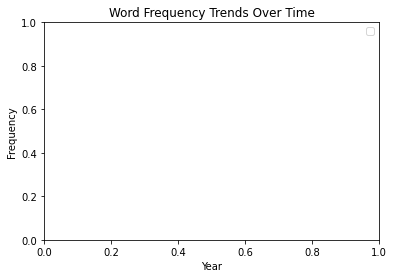

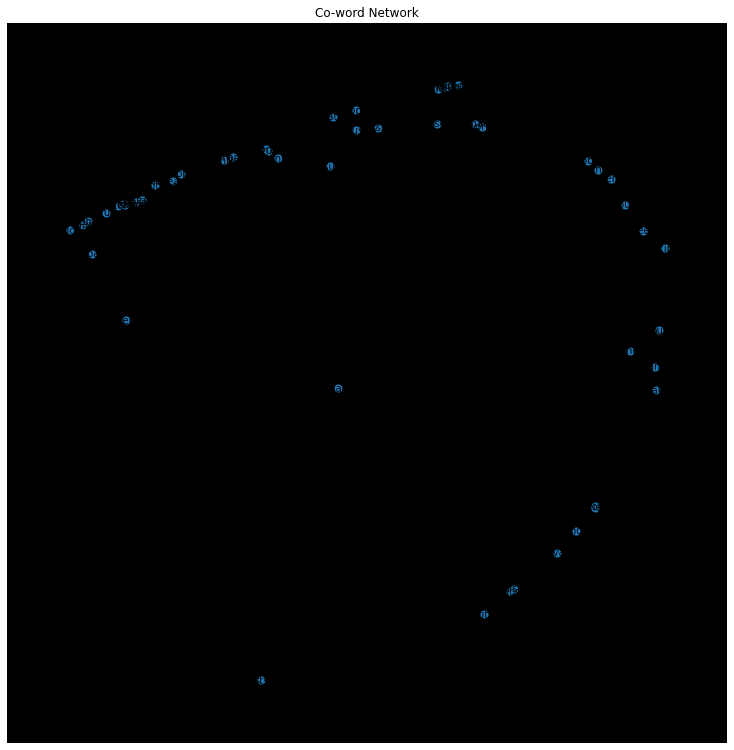

In [7]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Ensure you have the necessary NLTK data
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Load the CSV file
df = pd.read_csv("summaries.csv")

# Define a function to clean the text
def clean_text(text):
    # Remove newline characters
    text = text.replace('\n', ' ')

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove punctuation and stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

    # Join the tokens back into a string
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Apply the cleaning function to the 'Text' column
df['Cleaned Text'] = df['Text'].apply(clean_text)

# Combine all cleaned text into a single string
all_text = ' '.join(df['Cleaned Text'])

# Tokenize the combined text
tokens = word_tokenize(all_text)

# Calculate word frequencies
word_freq = Counter(tokens)

# Display the most common words
most_common_words = word_freq.most_common(50)
print(most_common_words)

# Define a function to create co-occurrence matrix
def create_co_occurrence_matrix(texts, vocab):
    vocab_index = {word: idx for idx, word in enumerate(vocab)}
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))
    
    for text in texts:
        words = word_tokenize(text)
        for word1, word2 in combinations(words, 2):
            if word1 in vocab_index and word2 in vocab_index:
                idx1, idx2 = vocab_index[word1], vocab_index[word2]
                co_occurrence_matrix[idx1, idx2] += 1
                co_occurrence_matrix[idx2, idx1] += 1
    
    return co_occurrence_matrix, vocab_index

# Define the vocabulary (most common words)
vocab = [word for word, freq in most_common_words]

# Create the co-occurrence matrix
co_occurrence_matrix, vocab_index = create_co_occurrence_matrix(df['Cleaned Text'], vocab)

# Create a DataFrame for the co-occurrence matrix
co_occurrence_df = pd.DataFrame(co_occurrence_matrix, index=vocab, columns=vocab)
display(co_occurrence_df.head())

# Calculate word frequencies per year
df['Year'] = df['Year'].astype(int)
word_freq_per_year = df.groupby('Year')['Cleaned Text'].apply(lambda x: Counter(' '.join(x).split()))

# Convert to DataFrame for easier handling
word_freq_per_year_df = pd.DataFrame(word_freq_per_year.tolist(), index=word_freq_per_year.index).fillna(0).astype(int)
display(word_freq_per_year_df.head())

# Plot word frequency trends over time for selected words
def plot_word_trends(words):
    for word in words:
        if word in word_freq_per_year_df:
            plt.plot(word_freq_per_year_df.index, word_freq_per_year_df[word], label=word)
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.title('Word Frequency Trends Over Time')
    plt.legend()
    plt.show()

# Plot trends for a few selected words
plot_word_trends([word for word, _ in most_common_words[:10]])

# Create a network graph from the co-occurrence matrix
G = nx.Graph()

# Add nodes and edges
for word, idx in vocab_index.items():
    G.add_node(word)
    
for i in range(len(vocab)):
    for j in range(i+1, len(vocab)):
        if co_occurrence_matrix[i, j] > 0:
            G.add_edge(vocab[i], vocab[j], weight=co_occurrence_matrix[i, j])

# Draw the network graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.15)
nx.draw(G, pos, with_labels=True, node_size=50, font_size=10, width=[G[u][v]['weight']*0.1 for u,v in G.edges])
plt.title('Co-word Network')
plt.show()
